In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [11]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                             download=True,transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,
                                             download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,
                                           shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:09<00:00, 18817944.76it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


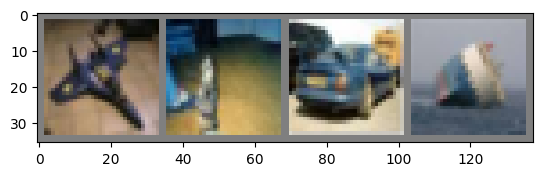

In [19]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
# output = (W-F+2*P)/S + 1
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [17]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs,labels) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1)%2000==0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}],Loss: {loss.item():.4f}')
print('finish training')

Epoch [1/4], Step [2000/12500],Loss: 2.3500
Epoch [1/4], Step [4000/12500],Loss: 2.2934
Epoch [1/4], Step [6000/12500],Loss: 2.2587
Epoch [1/4], Step [8000/12500],Loss: 2.2768
Epoch [1/4], Step [10000/12500],Loss: 2.0777
Epoch [1/4], Step [12000/12500],Loss: 1.8504
Epoch [2/4], Step [2000/12500],Loss: 1.7332
Epoch [2/4], Step [4000/12500],Loss: 1.5301
Epoch [2/4], Step [6000/12500],Loss: 1.6108
Epoch [2/4], Step [8000/12500],Loss: 2.5371
Epoch [2/4], Step [10000/12500],Loss: 2.3511
Epoch [2/4], Step [12000/12500],Loss: 2.3441
Epoch [3/4], Step [2000/12500],Loss: 1.7910
Epoch [3/4], Step [4000/12500],Loss: 2.5087
Epoch [3/4], Step [6000/12500],Loss: 1.4582
Epoch [3/4], Step [8000/12500],Loss: 1.7571
Epoch [3/4], Step [10000/12500],Loss: 1.7201
Epoch [3/4], Step [12000/12500],Loss: 1.0950
Epoch [4/4], Step [2000/12500],Loss: 1.0070
Epoch [4/4], Step [4000/12500],Loss: 1.0848
Epoch [4/4], Step [6000/12500],Loss: 1.6129
Epoch [4/4], Step [8000/12500],Loss: 1.4915
Epoch [4/4], Step [10000/1

In [18]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 46.252 %
Accuracy of plane: 43.6 %
Accuracy of car: 62.62 %
Accuracy of bird: 24.42 %
Accuracy of cat: 43.82 %
Accuracy of deer: 30.18 %
Accuracy of dog: 28.28 %
Accuracy of frog: 64.94 %
Accuracy of horse: 54.28 %
Accuracy of ship: 66.92 %
Accuracy of truck: 43.46 %
